In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [111]:
star=pd.read_csv('ntotal.csv',encoding='cp949')

In [112]:
star.head()

,dong_code,dong_name,starbucks,n_bank,n_starbucks,n_subway,male20to24_0,male20to24_1,male20to24_2,male20to24_3,...,Interval_Move_move_out,City-to-city_transport_move_in,City-to-city_transport_move_out,a_single_house,a_multi-family_house,for_business_purposes,apartment,a_row_house,a_multi-family_house.1,House_in_Non-residential_Buildings
0,11110515,청운효자동,1,4,1,0,13173,13478,13620,13677,...,992,520,637,912.0,331.0,106.0,261.0,783.0,1701.0,55.0
1,11110530,사직동,1,20,5,2,21326,20513,19978,19778,...,993,519,483,533.0,128.0,68.0,1532.0,78.0,386.0,46.0
2,11110540,삼청동,1,5,1,1,6314,6215,6236,6285,...,187,134,123,514.0,131.0,69.0,NaN,19.0,41.0,25.0
3,11110550,부암동,0,2,0,0,13161,13289,13328,13295,...,720,351,485,807.0,222.0,63.0,121.0,902.0,806.0,36.0
4,11110560,평창동,1,4,2,0,16801,17218,17512,17826,...,1296,850,978,1065.0,335.0,133.0,936.0,2180.0,1044.0,61.0


In [113]:
star.isna().sum()

dong_code                                           0
dong_name                                           0
starbucks                                           0
n_bank                                              0
n_starbucks                                         0
n_subway                                            0
male20to24_0                                        0
male20to24_1                                        0
male20to24_2                                        0
male20to24_3                                        0
male20to24_4                                        0
male20to24_5                                        0
male20to24_6                                        0
male20to24_7                                        0
male20to24_8                                        0
male20to24_9                                        0
male20to24_10                                       0
male20to24_11                                       0
male20to24_12               

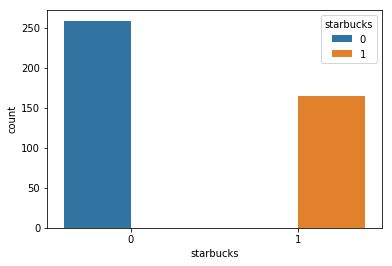

In [114]:
sns.countplot(data=star, x='starbucks', hue='starbucks')

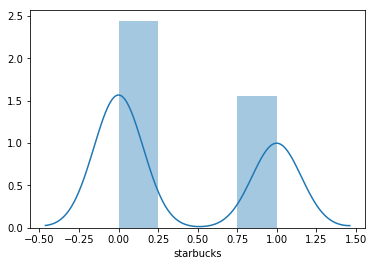

In [115]:
sns.distplot(star['starbucks'])

In [116]:
import random

In [117]:
from random import randint
random.seed(12)
star=star.fillna(randint(1,5)) # 자료설명을 보면 5 이하의 데이터는 결측값으로 처리하였다고 나와있음

In [118]:
star.isna().sum()

dong_code                                          0
dong_name                                          0
starbucks                                          0
n_bank                                             0
n_starbucks                                        0
n_subway                                           0
male20to24_0                                       0
male20to24_1                                       0
male20to24_2                                       0
male20to24_3                                       0
male20to24_4                                       0
male20to24_5                                       0
male20to24_6                                       0
male20to24_7                                       0
male20to24_8                                       0
male20to24_9                                       0
male20to24_10                                      0
male20to24_11                                      0
male20to24_12                                 

In [119]:
#star=star.drop(['dong_code','dong_name','danger_name','n_starbucks'],axis=1)

In [120]:
st=star.drop(['dong_name','dong_code','n_starbucks','danger_name','Number_of_employees'],axis=1)

In [122]:
st.head()

,starbucks,n_bank,n_subway,male20to24_0,male20to24_1,male20to24_2,male20to24_3,male20to24_4,male20to24_5,male20to24_6,...,Interval_Move_move_out,City-to-city_transport_move_in,City-to-city_transport_move_out,a_single_house,a_multi-family_house,for_business_purposes,apartment,a_row_house,a_multi-family_house.1,House_in_Non-residential_Buildings
0,1,4,0,13173,13478,13620,13677,13714,13970,14392,...,992,520,637,912.0,331.0,106.0,261.0,783.0,1701.0,55.0
1,1,20,2,21326,20513,19978,19778,19785,19870,20350,...,993,519,483,533.0,128.0,68.0,1532.0,78.0,386.0,46.0
2,1,5,1,6314,6215,6236,6285,6161,6195,6141,...,187,134,123,514.0,131.0,69.0,4.0,19.0,41.0,25.0
3,0,2,0,13161,13289,13328,13295,13299,13403,13441,...,720,351,485,807.0,222.0,63.0,121.0,902.0,806.0,36.0
4,1,4,0,16801,17218,17512,17826,18220,18266,18248,...,1296,850,978,1065.0,335.0,133.0,936.0,2180.0,1044.0,61.0


In [123]:
X = st.iloc[:, st.columns != 'starbucks']
y = st.iloc[:, st.columns == 'starbucks']

In [124]:
from imblearn.over_sampling import SMOTE # 클래스 불균형 해결 

In [125]:
sm=SMOTE(ratio='auto',kind='regular',random_state=10)

In [126]:
X_r,y_r=sm.fit_sample(X,y)

In [127]:
X.columns

Index(['n_bank', 'n_subway', 'male20to24_0', 'male20to24_1', 'male20to24_2',
       'male20to24_3', 'male20to24_4', 'male20to24_5', 'male20to24_6',
       'male20to24_7',
       ...
       'Interval_Move_move_out', 'City-to-city_transport_move_in',
       'City-to-city_transport_move_out', 'a_single_house',
       'a_multi-family_house', 'for_business_purposes', 'apartment',
       'a_row_house', 'a_multi-family_house.1',
       'House_in_Non-residential_Buildings'],
      dtype='object', length=422)

In [128]:
X_r=pd.DataFrame(X_r)

In [129]:
X_r.columns=X.columns

In [130]:
X_r.head()

,n_bank,n_subway,male20to24_0,male20to24_1,male20to24_2,male20to24_3,male20to24_4,male20to24_5,male20to24_6,male20to24_7,...,Interval_Move_move_out,City-to-city_transport_move_in,City-to-city_transport_move_out,a_single_house,a_multi-family_house,for_business_purposes,apartment,a_row_house,a_multi-family_house.1,House_in_Non-residential_Buildings
0,4.0,0.0,13173.0,13478.0,13620.0,13677.0,13714.0,13970.0,14392.0,14587.0,...,992.0,520.0,637.0,912.0,331.0,106.0,261.0,783.0,1701.0,55.0
1,20.0,2.0,21326.0,20513.0,19978.0,19778.0,19785.0,19870.0,20350.0,22318.0,...,993.0,519.0,483.0,533.0,128.0,68.0,1532.0,78.0,386.0,46.0
2,5.0,1.0,6314.0,6215.0,6236.0,6285.0,6161.0,6195.0,6141.0,6367.0,...,187.0,134.0,123.0,514.0,131.0,69.0,4.0,19.0,41.0,25.0
3,2.0,0.0,13161.0,13289.0,13328.0,13295.0,13299.0,13403.0,13441.0,13470.0,...,720.0,351.0,485.0,807.0,222.0,63.0,121.0,902.0,806.0,36.0
4,4.0,0.0,16801.0,17218.0,17512.0,17826.0,18220.0,18266.0,18248.0,18032.0,...,1296.0,850.0,978.0,1065.0,335.0,133.0,936.0,2180.0,1044.0,61.0


In [131]:
y_r=pd.DataFrame(y_r)

In [132]:
y_r.columns=y.columns

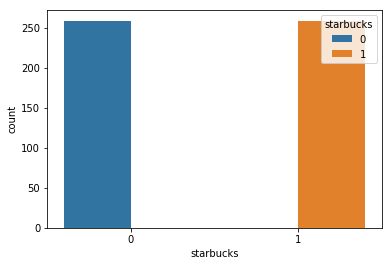

In [133]:
sns.countplot(data=y_r, x='starbucks', hue='starbucks')

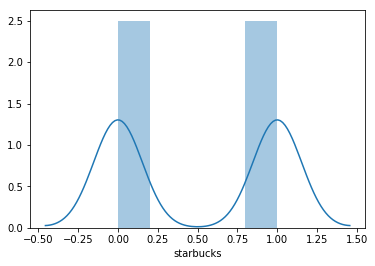

In [134]:
sns.distplot(y_r['starbucks'])

In [135]:
X.shape

(424, 422)

In [136]:
X_r.shape

(518, 422)

In [137]:
y.shape

(424, 1)

In [138]:
y_r.shape

(518, 1)

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_r,y_r,test_size = 0.3, random_state = 10)

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
clf = RandomForestClassifier(n_estimators=50, random_state=10, n_jobs=-1)
clf = clf.fit(X_train, y_train)

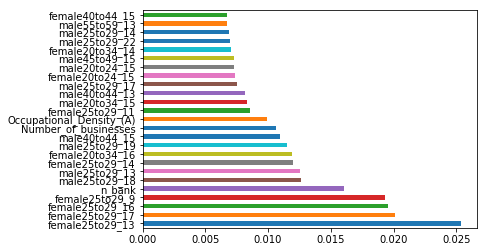

In [143]:
pd.Series(data=dict(zip(X_train.columns, clf.feature_importances_))).nlargest(25).plot(kind="barh");

In [144]:
from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier(n_jobs=-1,verbose=100,random_state=10, n_estimators=50)
selector = RFECV(estimator, step=20, cv=5)
selector = selector.fit(X_train, y_train)
selector.support_

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50building tree 7 of 50
building tree 8 of 50

building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50

building tree 13 of 50[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s

building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50
building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50[Parallel(n_jobs=-1)]: Done   9

[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Par

[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  30 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
[Par

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50building tree 4 of 50
building tree 5 of 50
building tree 6 of 50building tree 7 of 50

building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50

building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
building tree 16 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50building tree 19 of 50
building tree 20 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   9

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50building tree 3 of 50building tree 4 of 50
building tree 5 of 50
building tree 6 of 50

building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50

[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50
building tree 19 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s


building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50building tree 4 of 50building tree 5 of 50
building tree 6 of 50
building tree 7 of 50


building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50building tree 12 of 50

building tree 13 of 50[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s

building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 17 of 50
building tree 18 of 50building tree 19 of 50building tree 20 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s



building tree 21 of 50[Parallel(n_jobs=-1)]: Done   9

building tree 14 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s

building tree 15 of 50building tree 16 of 50
building tree 17 of 50

building tree 18 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 20 of 50
building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 22 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 23 of 50
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
building tree 24 of 50
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
building tree 25 of 50[Parallel(n_jobs=-1)]: Done  13 tasks      

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50building tree 6 of 50
building tree 7 of 50building tree 8 of 50
building tree 9 of 50
building tree 10 of 50


building tree 11 of 50
building tree 12 of 50

building tree 13 of 50building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s

building tree 15 of 50building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50building tree 19 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 20 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


building tree 21 of 50building tree 22 of 50
building

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50building tree 7 of 50building tree 8 of 50
building tree 9 of 50

building tree 10 of 50
building tree 11 of 50
building tree 12 of 50

building tree 13 of 50building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 20 of 50
building tree 21 of 50building tree 22 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=-1)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 41 of 50
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 42 of 50
[Parallel(n_jobs=-1)]: Done  30 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 43 of 50
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 44 of 50
[Parallel(n_jobs=-1)]: Done  32 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 45 of 50
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 46 of 50
building tree 47 of 50
[Parallel(n_jobs=-1)]: Done  34 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50
building tree 50 of 50[Parallel(n_jobs=-1)]: Done  37 out of  50

[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  30 

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50building tree 16 of 50

building tree 17 of 50
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50building tree 20 of 50building tree 21 of 50building tree 22 of 50

[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel

building tree 23 of 50
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
building tree 24 of 50
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
building tree 25 of 50
building tree 26 of 50[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 27 of 50
building tree 28 of 50
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
building tree 29 of 50building tree 30 of 50

building tree 31 of 50[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 32 of 50
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
building tree 33 of 50
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
building tree 34 of 50
[Parallel(n_jobs=-1)]: Done  22 tasks     

[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:    0.0s
[Paralle

building tree 31 of 50

[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
building tree 32 of 50building tree 33 of 50[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s


building tree 34 of 50building tree 35 of 50

[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
building tree 36 of 50
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 37 of 50building tree 38 of 50
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 39 of 50
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 40 of 50
[Parallel(n_jobs=-1)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 41 of 50
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 42 of 50buil

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50

building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 19 of 50building tree 20 of 50building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 

[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: 

[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50
building tree 19 of 50
building tree 20 of 50

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   

building tree 47 of 50
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50
building tree 49 of 50
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50building tree 9 of 50


building tree 10 of 50building tree 11 of 50building tree 12 of 50


building tree 13 of 50building tree 14 of 50

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 19 of 50
building tree 20 of 50building tree 21 of 50

[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   

building tree 34 of 50[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
building tree 35 of 50[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 36 of 50
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 37 of 50
building tree 38 of 50
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 39 of 50
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 40 of 50
building tree 41 of 50
[Parallel(n_jobs=-1)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 42 of 50building tree 43 of 50
[Parallel(n_jobs=-1)]: Done  30 out of  50 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:    0.0s remaining:    0.0s
building tre

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50building tree 16 of 50
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50building tree 20 of 50
building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9

building tree 45 of 50building tree 46 of 50[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done  34 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 47 of 50
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed

[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  30 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  50 | elapsed:   

building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed

[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  30 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: 

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50building tree 16 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50

building tree 18 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50

[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 20 of 50building tree 21 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50building tree 11 of 50

building tree 12 of 50

building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 17 of 50building tree 18 of 50building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 20 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   9

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50

building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50

building tree 11 of 50building tree 12 of 50

building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50
building tree 20 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 21 of 50[Parallel(n_jobs=-1)]: Done   9

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  30 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  50 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50building tree 12 of 50

building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50building tree 19 of 50
building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50
building tree 22 of 50[Parallel(

building tree 47 of 50
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50building tree 49 of 50

[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50
building tree 9 of 50

building tree 10 of 50building tree 11 of 50building tree 12 of 50


building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50building tree 18 of 50

building tree 19 of 50

building tree 20 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50building tree 22 of 50

building

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  30 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: 

building tree 47 of 50
building tree 48 of 50building tree 49 of 50[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 50 of 50

[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=

building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50
building tree 9 of 50


building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50
building tree 18 of 50building tree 19 of 50building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   9

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50

building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
building tree 16 of 50

[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50
building tree 18 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 19 of 50building tree 20 of 50building tree 21 of 50

[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9

building tree 36 of 50
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 37 of 50
building tree 38 of 50
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 39 of 50
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 40 of 50building tree 41 of 50
[Parallel(n_jobs=-1)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 42 of 50[Parallel(n_jobs=-1)]: Done  30 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 43 of 50[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 44 of 50
[Parallel(n_jobs=-1)]: Done  32 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 45 of 50
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 46 of 50[Parallel(n_jo

[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50building tree 5 of 50building tree 6 of 50
building tree 7 of 50
building tree 8 of 50

building tree 9 of 50
building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50

building tree 19 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50building tree 22 of 50

[Parall

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50building tree 9 of 50
building tree 10 of 50


building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50
building tree 17 of 50[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50
building tree 20 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50

[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
building tree 32 of 50[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 33 of 50[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 34 of 50building tree 35 of 50building tree 36 of 50[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s



building tree 37 of 50
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
building tree 38 of 50
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 39 of 50[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 40 of 50building tree 41 of 50

[Parallel(n_jobs=-1)]: Done  28 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 42 of 50
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 20 of 50building tree 21 of 50building tree 22 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(

building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Para

[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50building tree 11 of 50


building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s

building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50building tree 20 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50building tree 22 of 50
building t

building tree 15 of 50
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 18 of 50building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 20 of 50building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 22 of 50
building tree 23 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 24 of 50building tree 25 of 50
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

bui

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50

building tree 13 of 50building tree 14 of 50building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s


building tree 16 of 50building tree 17 of 50[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50

[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 20 of 50
building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50

building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50building tree 11 of 50
building tree 12 of 50


building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50building tree 7 of 50
building tree 8 of 50
building tree 9 of 50

building tree 10 of 50building tree 11 of 50
building tree 12 of 50

building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50

[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50building tree 17 of 50building tree 18 of 50


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 21 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50


building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 15 of 50building tree 16 of 50
building tree 17 of 50

[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50
building tree 19 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 21 of 50building tree 22 of 50building 

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50building tree 6 of 50
building tree 7 of 50
building tree 8 of 50building tree 9 of 50building tree 10 of 50


building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50building tree 15 of 50
building tree 16 of 50building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50


building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 20 of 50
building tree 21 of 50building tree 22 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

[Paralle

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50building tree 11 of 50
building tree 12 of 50


building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50

building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 21 of 50
building tree 22 of 50[Paralle

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50building tree 21 of 50building tree 22 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s



[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parall

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50building tree 7 of 50
building tree 8 of 50
building tree 9 of 50

building tree 10 of 50
building tree 11 of 50building tree 12 of 50

building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 16 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 17 of 50
building tree 18 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 20 of 50building tree 21 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s


building tree 19 of 50building tree 20 of 50

building tree 21 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 22 of 50
building tree 23 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | el

array([ True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,

Optimal number of features : 182


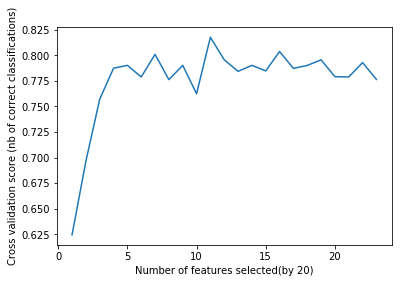

In [145]:
import matplotlib.pyplot as plt
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected(by 20)")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [146]:
X_train_new=X_train[X_train.columns[selector.support_]]
X_test_new=X_test[X_test.columns[selector.support_]]

In [149]:
from sklearn.svm import SVC

In [177]:
svclassifier = SVC(kernel='poly',random_state=523)
svc=svclassifier.fit(X_train_new, y_train)

In [178]:
from sklearn.metrics import classification_report
y_pred_S=svc.predict(X_test_new)
# classification matrix
print('\nClassification metrics')
print(classification_report(y_true=y_test, y_pred=y_pred_S))


Classification metrics
             precision    recall  f1-score   support

          0       0.76      0.68      0.72        78
          1       0.71      0.78      0.74        78

avg / total       0.73      0.73      0.73       156



In [152]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
random_state=[int(x) for x in np.linspace(start = 10, stop = 1024, num = 1)]
nthread=[int(x) for x in np.linspace(start = 10, stop = 1024, num = 1)]
booster='gbtree','gblinear','dart'
param_grid = dict(n_estimators=n_estimators,random_state=random_state,booster=booster,nthread=nthread)

In [185]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb= XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, n_jobs=-1)
grid_result = grid_search.fit(X_train_new, y_train)

In [186]:
grid_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=94,
       n_jobs=1, nthread=10, objective='binary:logistic', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [188]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=94,
       n_jobs=1, nthread=10, objective='binary:logistic', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [189]:
from sklearn.model_selection import cross_val_score
xgb_scores = cross_val_score(xgb, X_train_new, y_train, cv=10)
print('Scores =', xgb_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(xgb_scores), np.std(xgb_scores)))

Scores = [0.76315789 0.80555556 0.83333333 0.88888889 0.83333333 0.69444444
 0.83333333 0.77777778 0.83333333 0.72222222]
CV accuracy: 0.799 +/- 0.056


In [190]:
xgb_model=xgb.fit(X_train_new, y_train)

In [191]:
y_pred=xgb_model.predict(X_test_new)
# classification matrix
print('\nClassification metrics')
print(classification_report(y_true=y_test, y_pred=y_pred))


Classification metrics
             precision    recall  f1-score   support

          0       0.79      0.79      0.79        78
          1       0.79      0.79      0.79        78

avg / total       0.79      0.79      0.79       156



In [161]:
import lightgbm as lgb

In [162]:
lgbm=lgb.LGBMClassifier()
grid_search = GridSearchCV(lgbm, param_grid, n_jobs=-1)
grid_result = grid_search.fit(X_train_new, y_train)

In [163]:
grid_result.best_estimator_

LGBMClassifier(booster='gbtree', boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=200, n_jobs=-1, nthread=10,
        num_leaves=31, objective=None, random_state=10, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [164]:
lgbm = lgb.LGBMClassifier(booster='gbtree', boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=200, n_jobs=-1, nthread=10,
        num_leaves=31, objective=None, random_state=10, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [165]:
lgbm_scores = cross_val_score(lgbm, X_train_new, y_train,cv=5)
print('Scores =', lgbm_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(lgbm_scores), np.std(lgbm_scores)))

Scores = [0.78378378 0.86111111 0.75       0.80555556 0.81944444]
CV accuracy: 0.804 +/- 0.037


In [166]:
lgb_model=lgbm.fit(X_train_new, y_train)

In [167]:
y_pred_L=lgb_model.predict(X_test_new)
# classification matrix
print('\nClassification metrics')
print(classification_report(y_true=y_test, y_pred=y_pred_L))


Classification metrics
             precision    recall  f1-score   support

          0       0.77      0.81      0.79        78
          1       0.80      0.76      0.78        78

avg / total       0.78      0.78      0.78       156

